*load* dataset

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [ ]:
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 592.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.17.0 requires tensorflow<2.18,>=2.17.0, but you have tensorflow 2.18.0 which 

Preprocessing the Data

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:13<00:00, 204MB/s]
100% 2.04G/2.04G [00:13<00:00, 163MB/s]


In [ ]:
from zipfile import ZipFile
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Grape___healthy']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Grape___healthy']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Grape___healthy']


In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset - Update this to the correct path where your dataset is located.
# dataset_path = '/root/.cache/kagglehub/datasets/soumiknafiul/plantvillage-dataset-labeled/versions/1' # Replace with the actual path to your dataset
dataset_path =  'plantvillage dataset/color'# Dataset Path'plantvillage dataset/color'   # Replace with the actual path to your dataset if different




encode and normalization and t,v model

In [ ]:
categories = os.listdir(dataset_path)
# Initialize lists to hold images and labels
images = []
labels = []

# Load images and labels
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)

        # Convert image to RGB to ensure consistent color channels
        image = image.convert('RGB')

        image = image.resize((128, 128))  # Resize images to 128x128
        images.append(np.array(image))
        labels.append(category)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to [0, 1]
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(integer_encoded)

# Image Parameters
img_size = 224
batch_size = 32
# Image Data Generators
img_height = 256
img_width = 256
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width), #  target_size
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width), #  target_size
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


 check nan values

In [ ]:
import tensorflow as tf
# Check for NaN values
images = np.array(images)
#labels = np.array(labels)

print(f"NaN values in images: {np.isnan(images).sum()}")

# Define class_names if it's not already defined
if 'class_names' not in locals():
    class_names = np.unique(labels)  # Assuming labels is a list or array of class names

print(f"NaN values in images: {np.isnan(images).sum()}")


# Remove corrupted files (if any)
corrupted_files = [] # Define an empty list for corrupted_files, or load it if it's already stored

if corrupted_files:
    print(f"Total corrupted files: {len(corrupted_files)}")
    print("Corrupted files removed from the dataset.")

# One-hot encode labels
# Ensure labels is a numerical representation before one-hot encoding
# Assuming labels is a list or array of class names, convert it to numerical labels first
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(numerical_labels, num_classes=len(class_names)) # One-hot encode using the numerical labels


NaN values in images: 0
NaN values in images: 0


outliers

Detected 1088 outliers. Removing them...


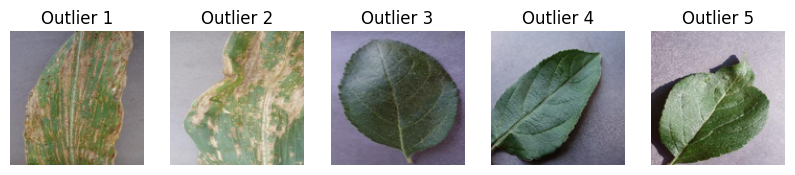

In [ ]:
# Detect outliers based on pixel values
mean_pixel_values = np.mean(images, axis=(1, 2, 3))
std_pixel_values = np.std(images, axis=(1, 2, 3))

# Define thresholds for outliers
lower_threshold = np.percentile(mean_pixel_values, 1)  # 1st percentile
upper_threshold = np.percentile(mean_pixel_values, 99)  # 99th percentile

# Find outlier indices
outlier_indices = np.where((mean_pixel_values < lower_threshold) | (mean_pixel_values > upper_threshold))[0]

# Remove outliers
if len(outlier_indices) > 0:
    print(f"Detected {len(outlier_indices)} outliers. Removing them...")
    images = np.delete(images, outlier_indices, axis=0)
    labels = np.delete(labels, outlier_indices, axis=0)

# Visualize some outliers (if any)
if len(outlier_indices) > 0:
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(outlier_indices[:5]):  # Display first 5 outliers
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Outlier {i + 1}")
        plt.axis('off')
    plt.show()

Class distribution: {0.0: 1969029, 1.0: 53217}


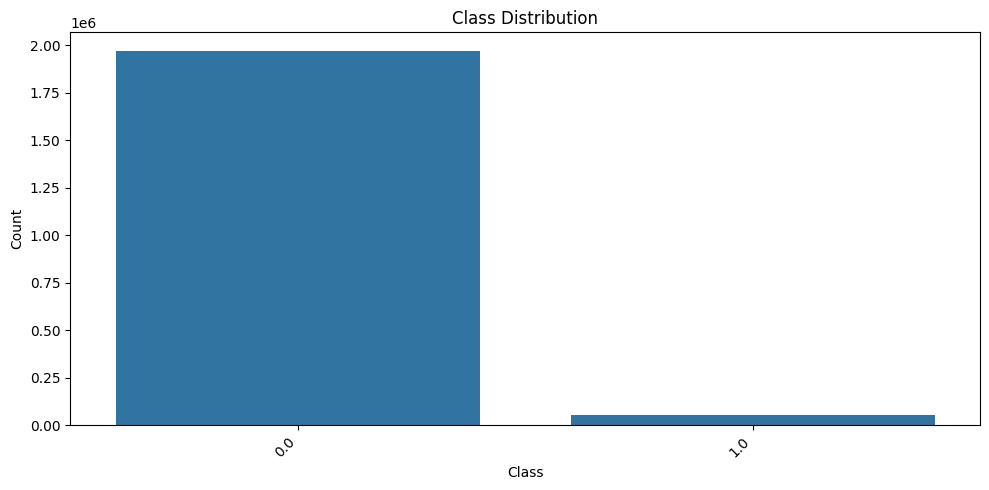

Imbalanced dataset detected. Applying oversampling...


In [ ]:
import seaborn as sns
# Calculate class distribution (number of images per category)
unique_labels, class_counts = np.unique(labels, return_counts=True)
print("Class distribution:", dict(zip(unique_labels, class_counts)))


# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=unique_labels, y=class_counts)  # Use unique_labels for x-axis
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Handle imbalanced data (if necessary)

# Check if class_names is defined, if not, assign it with unique_labels
if 'class_names' not in locals():
    class_names = unique_labels

# Assuming RandomOverSampler, img_width, img_height are defined somewhere earlier
# Update this part if they are not defined in your earlier code.
if np.any(class_counts < 0.5 * np.mean(class_counts)):  # Check if any class is significantly smaller
    print("Imbalanced dataset detected. Applying oversampling...")
    from imblearn.over_sampling import RandomOverSampler  # Import RandomOverSampler if not already done

    ros = RandomOverSampler(random_state=42)
    images_reshaped = images.reshape(images.shape[0], -1)  # Flatten images for oversampling
    images_resampled, labels_resampled = ros.fit_resample(images_reshaped, np.argmax(labels, axis=1))
    images = images_resampled.reshape(-1, img_width, img_height, 3)  # Reshape back to image format
    labels = tf.keras.utils.to_categorical(labels_resampled, num_classes=len(class_names))
    #print("Resampled class distribution:", np.sum(labels, axis=0))

In [ ]:

# Convert image data and labels to 1-dimensional representations
# Flatten image data if necessary
image_data_1d = [img.flatten() for img in images]

# Extract the class index from the one-hot encoded labels
label_1d = np.argmax(labels, axis=1)

# Create the DataFrame
df = pd.DataFrame({'image_data': image_data_1d, 'label': label_1d})

print(df.head())

                                          image_data  label
0  [0.6980392156862745, 0.6235294117647059, 0.639...     22
1  [0.6705882352941176, 0.596078431372549, 0.6196...     22
2  [0.615686274509804, 0.5411764705882353, 0.5647...     22
3  [0.5764705882352941, 0.5019607843137255, 0.517...     22
4  [0.7137254901960784, 0.7098039215686275, 0.733...     22


In [ ]:
# Example: Splitting the DataFrame into two based on the index
df1 = df.iloc[:len(df) // 2]  # First half of the DataFrame
df2 = df.iloc[len(df) // 2:]  # Second half of the DataFrame

# Assuming df1 and df2 are two dataframes you want to merge
merged_df = pd.merge(df1, df2, on='label', how='inner')

# Display the first few rows of the merged dataset
print(merged_df.head())

                                        image_data_x  label  \
0  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
1  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
2  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
3  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
4  [0.47843137254901963, 0.3843137254901961, 0.34...     26   

                                        image_data_y  
0  [0.37254901960784315, 0.34509803921568627, 0.3...  
1  [0.9215686274509803, 0.8862745098039215, 0.898...  
2  [0.3215686274509804, 0.2980392156862745, 0.345...  
3  [0.596078431372549, 0.5686274509803921, 0.6313...  
4  [0.6745098039215687, 0.6431372549019608, 0.694...  


In [ ]:
# Drop rows with any missing values
cleaned_df = merged_df.dropna()

# Display the first few rows of the cleaned dataset
print(cleaned_df.head())

                                        image_data_x  label  \
0  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
1  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
2  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
3  [0.47843137254901963, 0.3843137254901961, 0.34...     26   
4  [0.47843137254901963, 0.3843137254901961, 0.34...     26   

                                        image_data_y  
0  [0.37254901960784315, 0.34509803921568627, 0.3...  
1  [0.9215686274509803, 0.8862745098039215, 0.898...  
2  [0.3215686274509804, 0.2980392156862745, 0.345...  
3  [0.596078431372549, 0.5686274509803921, 0.6313...  
4  [0.6745098039215687, 0.6431372549019608, 0.694...  


In [ ]:
from sklearn.impute import SimpleImputer


# Create separate DataFrames for image data and labels
image_data_df = merged_df[['image_data_x', 'image_data_y']]
label_df = merged_df[['label']]

# Initialize the imputer (you can choose different strategies like 'mean', 'median', 'most_frequent', etc.)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer only to the label DataFrame (numerical features)
imputed_label_data = imputer.fit_transform(label_df)

# Convert the imputed label data back to a DataFrame
imputed_label_df = pd.DataFrame(imputed_label_data, columns=label_df.columns)

# Concatenate the imputed label DataFrame with the original image data DataFrame
imputed_df = pd.concat([image_data_df, imputed_label_df], axis=1)

# Display the first few rows of the imputed dataset
print(imputed_df.head())

                                        image_data_x  \
0  [0.47843137254901963, 0.3843137254901961, 0.34...   
1  [0.47843137254901963, 0.3843137254901961, 0.34...   
2  [0.47843137254901963, 0.3843137254901961, 0.34...   
3  [0.47843137254901963, 0.3843137254901961, 0.34...   
4  [0.47843137254901963, 0.3843137254901961, 0.34...   

                                        image_data_y  label  
0  [0.37254901960784315, 0.34509803921568627, 0.3...   26.0  
1  [0.9215686274509803, 0.8862745098039215, 0.898...   26.0  
2  [0.3215686274509804, 0.2980392156862745, 0.345...   26.0  
3  [0.596078431372549, 0.5686274509803921, 0.6313...   26.0  
4  [0.6745098039215687, 0.6431372549019608, 0.694...   26.0  


In [ ]:
# Save the cleaned dataset to a new CSV file
cleaned_df.to_csv('cleaned_plantvillage_dataset.csv', index=False)

In [ ]:
# Now apply scaling
from sklearn.preprocessing import MinMaxScaler

# Reshape the image data to 2D before scaling
nsamples, nx, ny, nrgb = X_train.shape
X_train_reshape = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_test.shape
X_test_reshape = X_test.reshape((nsamples,nx*ny*nrgb))


scaler = MinMaxScaler()
xtrain = scaler.fit_transform(X_train_reshape) # Fit and transform on reshaped data
xtest = scaler.transform(X_test_reshape) # Transform using the fitted scaler

# Reshape back to the original shape if needed for further processing
X_train_scaled = xtrain.reshape(X_train.shape)
X_test_scaled = xtest.reshape(X_test.shape)

Image data verification:
- Original image array shape: (53217, 128, 128, 3)
- Data type: float64
- Pixel value range: [0.0000, 1.0000]
- Sample pixel values:
[0.69803922 0.62352941 0.63921569]

Label encoding verification:
- Original labels: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
- Integer encoded: [22 22 22 22 22]
- One-hot encoded shape: (54305, 38)
- Sample one-hot encoding:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

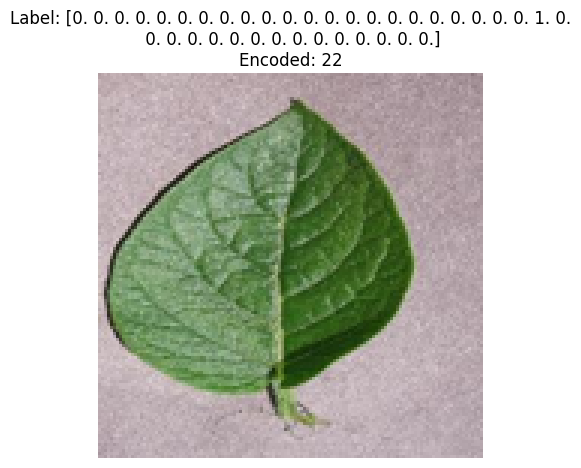


Dataset consistency check:
Number of images: 53217
Number of one-hot labels: 54305
Class to index mapping: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___h

In [ ]:
# 1. Verify image normalization
print("Image data verification:")
print(f"- Original image array shape: {images.shape}")
print(f"- Data type: {images.dtype}")
print(f"- Pixel value range: [{images.min():.4f}, {images.max():.4f}]")
print(f"- Sample pixel values:\n{images[0][0,0]}")  # First pixel's RGB values

# 2. Verify label encoding
print("\nLabel encoding verification:")
print(f"- Original labels: {labels[:5]}")  # First 5 original labels
print(f"- Integer encoded: {integer_encoded[:5]}")  # First 5 encoded labels
print(f"- One-hot encoded shape: {one_hot_labels.shape}")
print(f"- Sample one-hot encoding:\n{one_hot_labels[:5]}")  # First 5 one-hot vectors

# 3. Check class mapping
print("\nClass mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_name}")

# 4. Visualize a normalized image
plt.figure(figsize=(5, 5))
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}\nEncoded: {integer_encoded[0]}")
plt.axis('off')
plt.show()

# 5. Verify dataset consistency
print("\nDataset consistency check:")
print(f"Number of images: {len(images)}")
print(f"Number of one-hot labels: {len(one_hot_labels)}")
print("Class to index mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

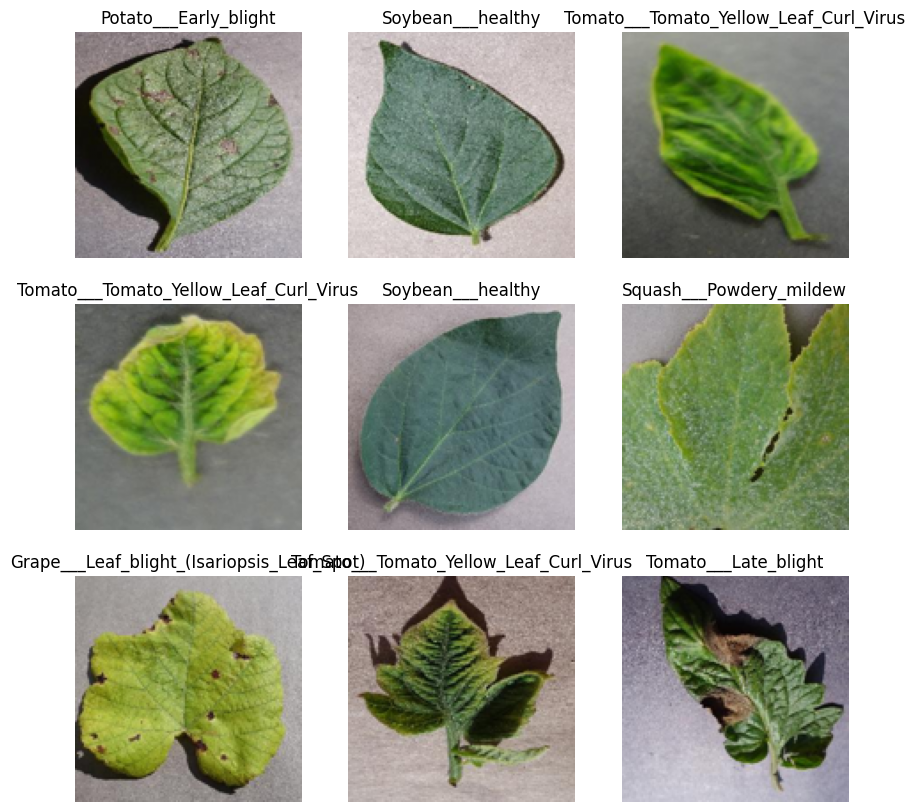

In [ ]:
# Plot sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(label_encoder.inverse_transform([np.argmax(y_train[i])])[0])
    plt.axis("off")
plt.show()

In [ ]:
########### i use it to handel error but i don't know if remove it or not ...

import pandas as pd
import numpy as np

# Assuming 'images' is your NumPy array of images (shape: (num_images, height, width, channels))
# Assuming 'labels' is your NumPy array of labels (shape: (num_images,))

# Flatten the image data if it's multi-dimensional
image_data_flat = images.reshape(images.shape[0], -1)

# Check the shape of 'labels'
print(labels.shape)

# Convert label to one-hot encoding if it's a numerical label
if labels.ndim == 1:
    num_classes = len(np.unique(labels))
    from tensorflow.keras.utils import to_categorical
    labels = to_categorical(labels, num_classes=num_classes)
elif labels.ndim != 2:
    raise ValueError("Labels should be either a 1D array or a 2D one-hot encoded array.")

# Create the DataFrame
df = pd.DataFrame({'image_data': list(image_data_flat), 'label': list(labels)})

print(df.head())

(53217, 38)
                                          image_data  \
0  [0.6980392156862745, 0.6235294117647059, 0.639...   
1  [0.6705882352941176, 0.596078431372549, 0.6196...   
2  [0.615686274509804, 0.5411764705882353, 0.5647...   
3  [0.5764705882352941, 0.5019607843137255, 0.517...   
4  [0.7137254901960784, 0.7098039215686275, 0.733...   

                                               label  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


Building the Model

In [ ]:
# Build a simple CNN model
# Change models.Sequential to keras.models.Sequential
from tensorflow import keras
from tensorflow.keras import layers

# Define the input shape to match the actual shape of your images (128, 128, 3)
model = keras.models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),  # Changed input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')  # Using len(categories) for output size
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

Evaluating Performance

In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))  # Adjust epochs and validation data as needed

# Now you can plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1098s 807ms/step - accuracy: 0.5392 - loss: 1.6933 - val_accuracy: 0.8378 - val_loss: 0.5163
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1084s 798ms/step - accuracy: 0.8826 - loss: 0.3669 - val_accuracy: 0.8902 - val_loss: 0.3418
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1078s 793ms/step - accuracy: 0.9310 - loss: 0.2104 - val_accuracy: 0.9109 - val_loss: 0.2874
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1072s 789ms/step - accuracy: 0.9571 - loss: 0.1301 - val_accuracy: 0.9072 - val_loss: 0.3210
Epoch 5/5
1163/1358 ━━━━━━━━━━━━━━━━━━━━ 2:25 748ms/step - accuracy: 0.9691 - loss: 0.0903

340/340 ━━━━━━━━━━━━━━━━━━━━ 76s 223ms/step


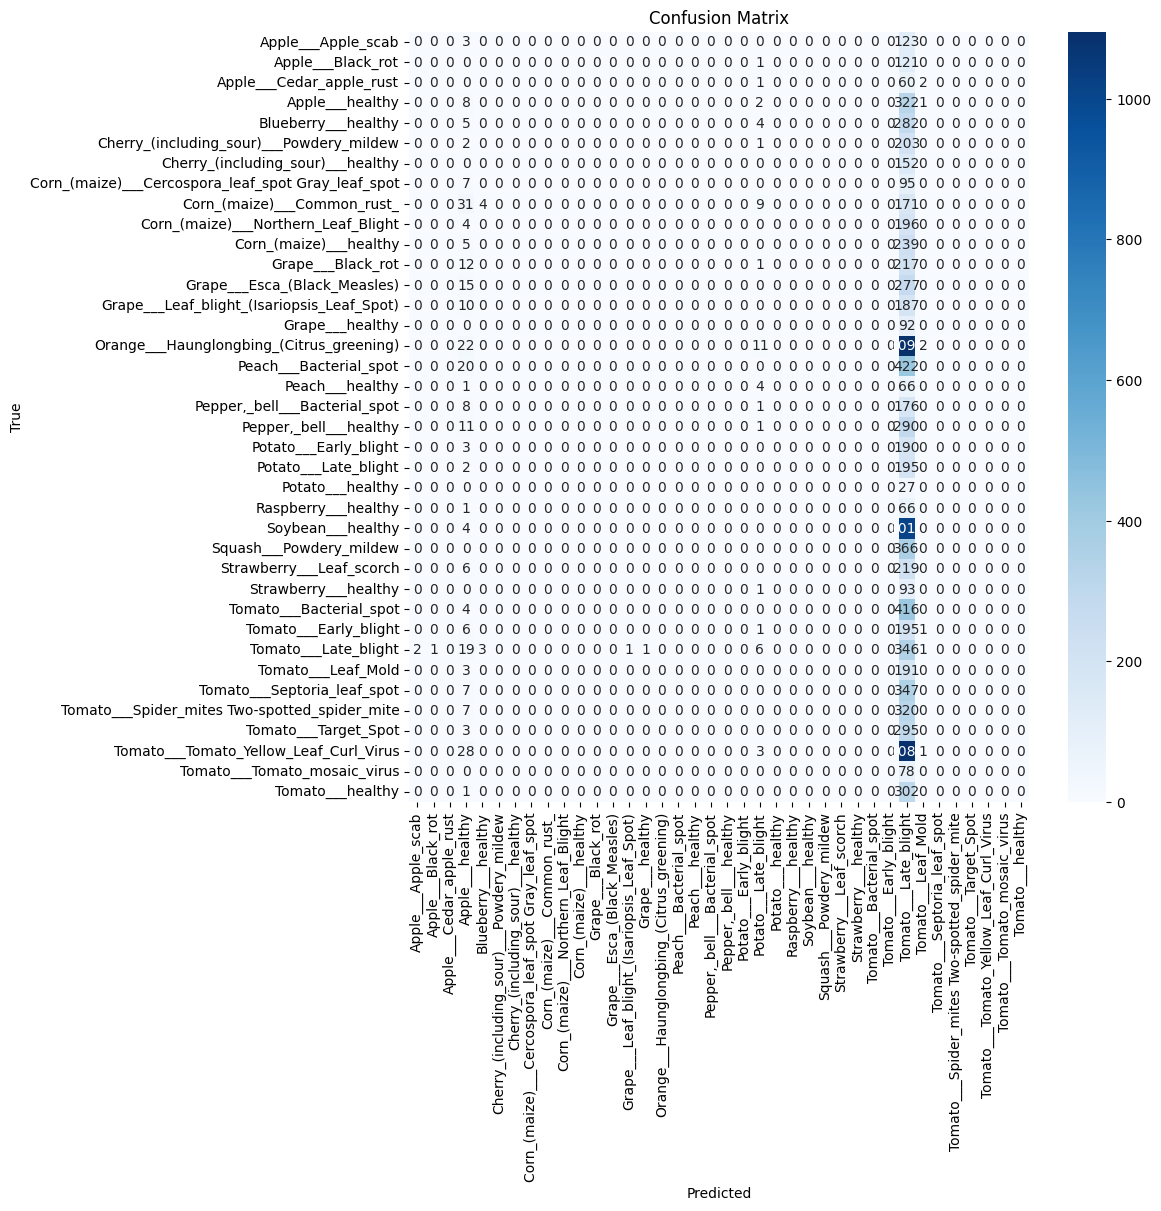

Accuracy: 0.0326


In [ ]:
# Predict on test data

from sklearn.metrics import confusion_matrix, accuracy_score # Import necessary functions
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

In [ ]:
df.head()
df.tail()
print( df.dtypes)
df.info()
df.describe()

image_data    object
label         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53217 entries, 0 to 53216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_data  53217 non-null  object
 1   label       53217 non-null  object
dtypes: object(2)
memory usage: 831.6+ KB
